# Kiva - Time-Series Data:

## This script contains the following: 

#### 1. Importing libraries and data 
#### 2. Subsetting, wrangling, and cleaning time-series data 
#### 3. Time seris analysis: decomposition 
#### 4. Testing for stationarity
#### 5. Stationarizing the Global Bank Data 

### 1. Importing libraries and data

In [1]:
# Import libraries 

import quandl 
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib
import matplotlib.pyplot as plt 
import statsmodels.api as sm 
import os 
import warnings 

warnings.filterwarnings("ignore")

plt.style.use('fivethirtyeight')

In [2]:
# Configure API key 

quandl.ApiConfig.api_key = 'wTu65-HWz9G35Fj2cvDx'

In [3]:
# Create path 

path = r'/Users/admin/Desktop/Kiva Data Analysis'

In [4]:
# Import dataframe from Quandl 
# Data : United Nations Commodity Trade: Trade in Edible Vegetables And Certain Roots And Tubers - Philippines

data = quandl.get('UNAE/GDPCDPC_PHL')

In [5]:
data.head()

,Gross Domestic Product (GDP)
Date,
1970-12-31,207.049795
1971-12-31,222.762758
1972-12-31,234.229009
1973-12-31,286.287283
1974-12-31,380.351272


In [6]:
data.shape # This is a small file!

(50, 1)

In [7]:
data.columns

Index(['Gross Domestic Product (GDP)'], dtype='object')

In [8]:
type(data)

pandas.core.frame.DataFrame

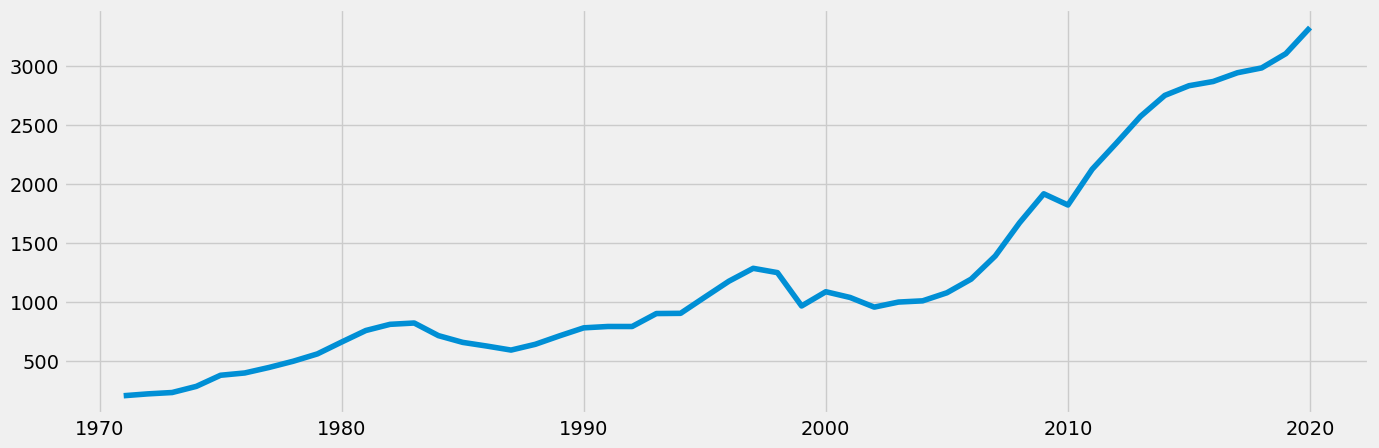

In [9]:
# Plot the data using matplotlib.

plt.figure(figsize=(15,5), dpi=100) 
# The dpi argument controls the quality of the visualization here. 
# When it's set to 100, it will produce lower-than-standard quality, which is useful if, similar to this notebook, you'll have a lot of plots.
# A large number of plots will increase the size of the notebook, which could take more time to load and eat up a lot of RAM!

plt.plot(data)

<b>Figure: time_series_1</b>

### 2. Subsetting, wrangling, and cleaning time-series data 

In [10]:
# Reset index so the "Date" column can be used as a filter 

data_2 = data.reset_index()

In [11]:
# View dataframe 

data_2.head()

,Date,Gross Domestic Product (GDP)
0,1970-12-31,207.049795
1,1971-12-31,222.762758
2,1972-12-31,234.229009
3,1973-12-31,286.287283
4,1974-12-31,380.351272


In [12]:
# Rename columns 
data_2.rename(columns = {'Date' : 'date', 'Gross Domestic Product (GDP)' : 'gdp'})

,date,gdp
0,1970-12-31,207.049795
1,1971-12-31,222.762758
2,1972-12-31,234.229009
3,1973-12-31,286.287283
4,1974-12-31,380.351272
5,1975-12-31,399.708961
6,1976-12-31,446.297957
7,1977-12-31,498.968659
8,1978-12-31,561.076143
9,1979-12-31,661.262453


In [16]:
# Overwrite the dataframe with renamed columns

data_2 = data_2.rename(columns = {'Date' : 'date', 'Gross Domestic Product (GDP)' : 'gdp'})

In [17]:
# Create a subset of the dataframe 
# Note: I'm aware this is unneccessary. However, I'm doing this as an exercise.

data_sub = data_2.loc[(data_2['date'] >= '1970-12-31') & (data_2['date'] < '2020-12-31')]

In [18]:
data_sub.shape 

(50, 2)

In [19]:
data_sub.head()

,date,gdp
0,1970-12-31,207.049795
1,1971-12-31,222.762758
2,1972-12-31,234.229009
3,1973-12-31,286.287283
4,1974-12-31,380.351272


In [20]:
# Set the "date" column as the index 

from datetime import datetime 

data_sub['datetime'] = pd.to_datetime(data_sub['date'])
data_sub = data_sub.set_index('datetime')
data_sub.drop(['date'], axis = 1, inplace = True)  
data_sub.head()

,gdp
datetime,
1970-12-31,207.049795
1971-12-31,222.762758
1972-12-31,234.229009
1973-12-31,286.287283
1974-12-31,380.351272


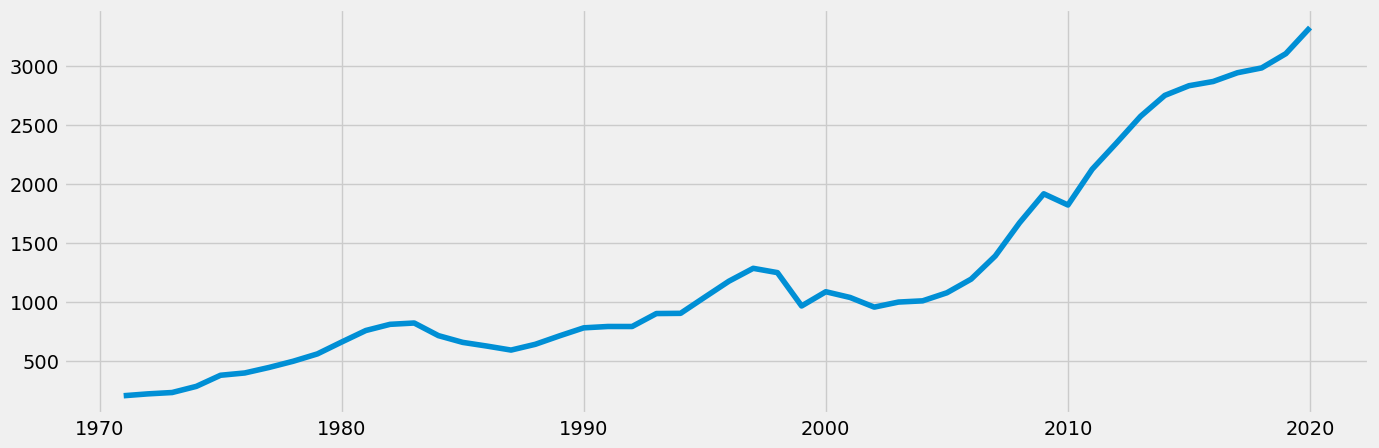

In [21]:
# Plot the new data set

plt.figure(figsize=(15,5), dpi=100)
plt.plot(data_sub)

<b>Figure: time_series_2</b>

In [22]:
# Check for missing values

data_sub.isnull().sum()

gdp    0
dtype: int64

In [23]:
# Check for duplicates 

dups = data_sub.duplicated() 
dups.sum() # No dups!

0

### 3. Time-series analysis: decomposition 

In [24]:
# Decompose the time series using an additive model 

decomposition = sm.tsa.seasonal_decompose(data_sub, model = 'additive')

In [25]:
from pylab import rcParams 
# This will define a fized size for all special charts

rcParams['figure.figsize'] = 18, 7 

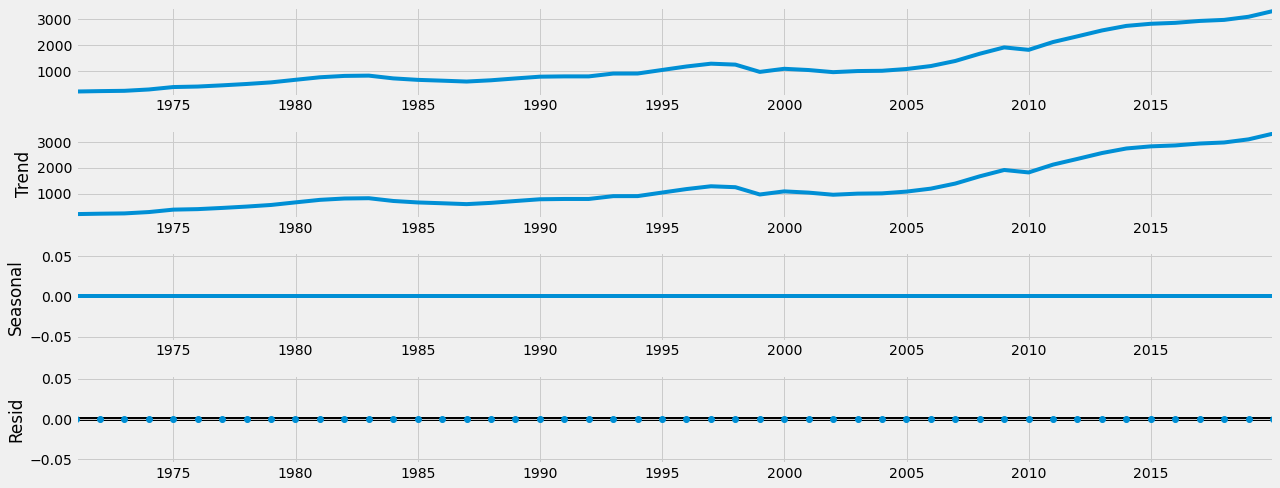

In [26]:
# Plot the separate components 

decomposition.plot()
plt.show()

<b>Figure: time_series_3</b>

### 4. Testing for stationarity 

In [27]:
# The adfuller() function will import from the model from statsmodels for the test; however, running it will only return 
# an array of numbers. This is why you need to also define a function that prints the correct output from that array.

from statsmodels.tsa.stattools import adfuller # Import the adfuller() function

def dickey_fuller(timeseries): # Define the function
    # Perform the Dickey-Fuller test:
    print ('Dickey-Fuller Stationarity test:')
    test = adfuller(timeseries, autolag='AIC')
    result = pd.Series(test[0:4], index=['Test Statistic','p-value','Number of Lags Used','Number of Observations Used'])
    for key,value in test[4].items():
       result['Critical Value (%s)'%key] = value
    print (result)

# Apply the test using the function on the time series
dickey_fuller(data_sub['gdp'])

Dickey-Fuller Stationarity test:
Test Statistic                  3.408224
p-value                         1.000000
Number of Lags Used            10.000000
Number of Observations Used    39.000000
Critical Value (1%)            -3.610400
Critical Value (5%)            -2.939109
Critical Value (10%)           -2.608063
dtype: float64


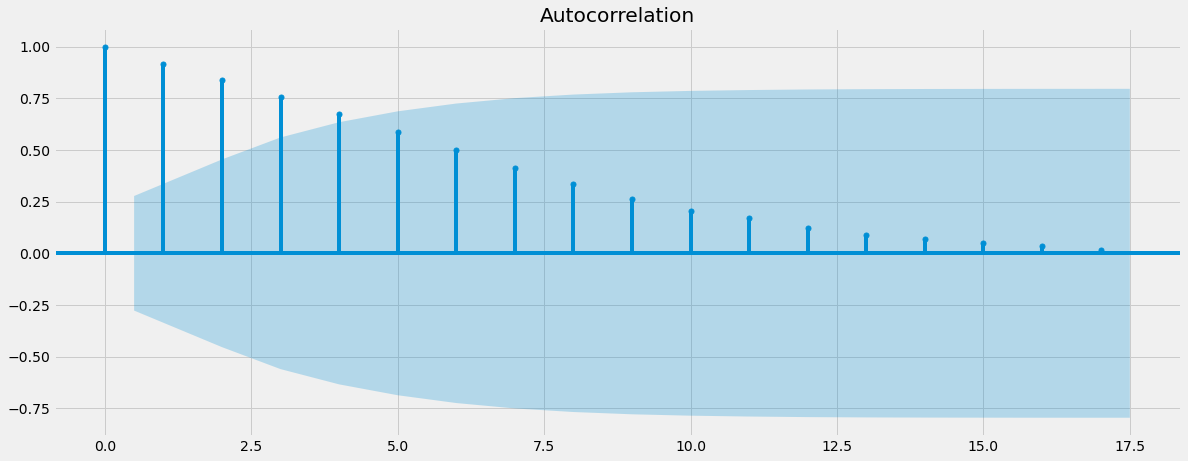

In [28]:
# Check out a plot of autocorrelations
# Import the autocorrelation and partial correlation plots

from statsmodels.graphics.tsaplots import plot_acf, plot_pacf 

plot_acf(data_sub)
plt.show()

<b>Figure: time_series_4</b>

### 5. Stationarizing the United Nations National Accounts Estimates - Per Capita GDP - Philippines  data

In [29]:
data_diff = data_sub - data_sub.shift(1) 
# The df.shift(1) function turns the observation to t-1, making the whole thing t - (t -1)

In [30]:
data_diff.dropna(inplace = True) 

# Remove the missing values that came about as a result of the differencing. 
# This has to be removed or the Dickey-Fuller test cannot be run. 

In [31]:
data_diff.head()

,gdp
datetime,
1971-12-31,15.712963
1972-12-31,11.466251
1973-12-31,52.058274
1974-12-31,94.063989
1975-12-31,19.357690


In [33]:
data_diff.columns

Index(['gdp'], dtype='object')

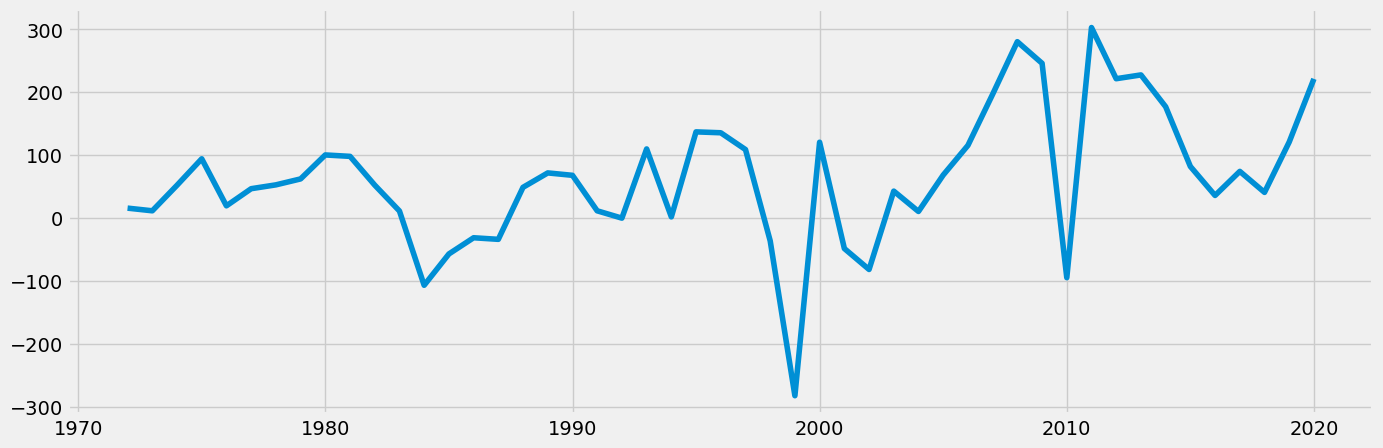

In [34]:
# Check out what the differencing did to the time-series curve

plt.figure(figsize=(15,5), dpi=100)
plt.plot(data_diff)

<b>Figure: time_series_5</b>

In [35]:
dickey_fuller(data_diff)

Dickey-Fuller Stationarity test:
Test Statistic                 -4.619371
p-value                         0.000119
Number of Lags Used             0.000000
Number of Observations Used    48.000000
Critical Value (1%)            -3.574589
Critical Value (5%)            -2.923954
Critical Value (10%)           -2.600039
dtype: float64


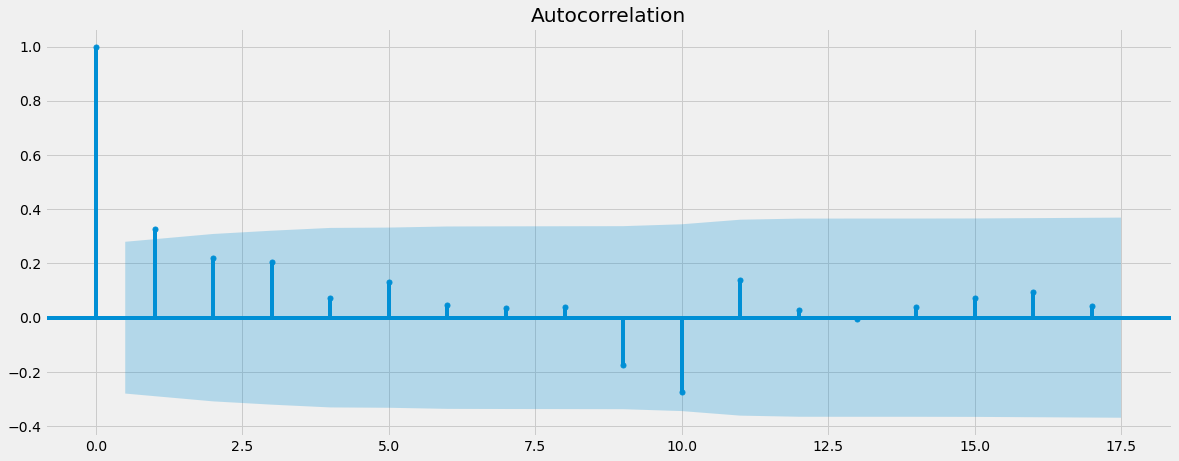

In [36]:
plot_acf(data_diff)
plt.show()

<b>Figure: time_series_6</b>